# Part 1

## Data Preprocessing

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_path ="dataset"

categories = os.listdir(data_path) #importing dataset category
labels = [0, 1]
label_dict = dict(zip(categories, labels))

print(categories)
print(label_dict)

['with mask', 'without mask']
{'with mask': 0, 'without mask': 1}


In [21]:
img_size = 80
data = []  #to store images
label = []  #for corresponding values, 0 or 1, for mask and without mask

In [22]:
for category in categories:  # 1st value of category is 'with mask', 2nd is 'without mask'
    folder_path = os.path.join(data_path, category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        
        try :
                img = cv2.resize(img,(img_size,img_size))  #resizing image

                #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #converting image in gray scale
            
                data.append(img)  #appending image in data
                label.append(label_dict[category])  #appending corresponding '0' or '1' in label
            
        except :
            print("An exception occurred")  #in case of error, this message will be printed here.

In [23]:
data[:2]

[array([[[ 69,  73,  65],
         [ 77,  82,  83],
         [ 86,  98, 104],
         ...,
         [ 23,  23,  23],
         [ 21,  21,  21],
         [ 19,  19,  19]],
 
        [[ 69,  74,  70],
         [ 77,  84,  87],
         [ 87,  98, 106],
         ...,
         [ 22,  22,  22],
         [ 20,  20,  20],
         [ 19,  19,  19]],
 
        [[ 71,  77,  75],
         [ 78,  86,  93],
         [ 88,  98, 108],
         ...,
         [ 21,  21,  21],
         [ 20,  20,  20],
         [ 19,  19,  19]],
 
        ...,
 
        [[ 31,  31,  31],
         [ 28,  28,  28],
         [ 27,  27,  27],
         ...,
         [ 82,  77,  74],
         [ 82,  77,  74],
         [ 82,  77,  74]],
 
        [[ 19,  19,  19],
         [ 16,  16,  16],
         [ 16,  16,  16],
         ...,
         [ 78,  73,  70],
         [ 78,  73,  70],
         [ 77,  72,  69]],
 
        [[ 10,  10,  10],
         [  8,   8,   8],
         [  9,   9,   9],
         ...,
         [ 77,  72,  68],
  

In [24]:
len(data)

5023

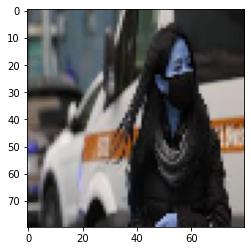

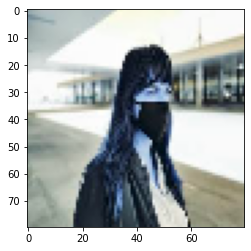

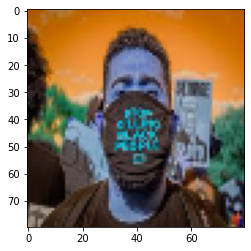

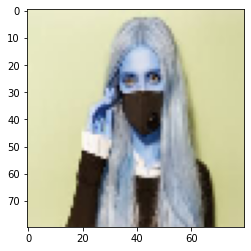

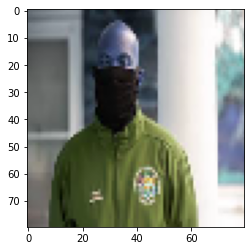

In [25]:
#showing first 5 images
for i in range(5):
    plt.imshow(data[i])
    plt.show()

In [26]:
label[:5]

[0, 0, 0, 0, 0]

In [27]:
data = np.array(data)/255.0  # normalizing between 0 and 1

data = np.reshape(data,(len(data),img_size,img_size,3))  #converting in 4d array

#data = np.reshape(data,(len(data),img_size,img_size,1))  #converting in 4d array  (in case of grayscale image)

In [28]:
data[:2]

array([[[[0.27058824, 0.28627451, 0.25490196],
         [0.30196078, 0.32156863, 0.3254902 ],
         [0.3372549 , 0.38431373, 0.40784314],
         ...,
         [0.09019608, 0.09019608, 0.09019608],
         [0.08235294, 0.08235294, 0.08235294],
         [0.0745098 , 0.0745098 , 0.0745098 ]],

        [[0.27058824, 0.29019608, 0.2745098 ],
         [0.30196078, 0.32941176, 0.34117647],
         [0.34117647, 0.38431373, 0.41568627],
         ...,
         [0.08627451, 0.08627451, 0.08627451],
         [0.07843137, 0.07843137, 0.07843137],
         [0.0745098 , 0.0745098 , 0.0745098 ]],

        [[0.27843137, 0.30196078, 0.29411765],
         [0.30588235, 0.3372549 , 0.36470588],
         [0.34509804, 0.38431373, 0.42352941],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.07843137, 0.07843137, 0.07843137],
         [0.0745098 , 0.0745098 , 0.0745098 ]],

        ...,

        [[0.12156863, 0.12156863, 0.12156863],
         [0.10980392, 0.10980392, 0.10980392]

In [50]:
data.shape

(5023, 80, 80, 3)

In [29]:
from keras.utils import np_utils

label = np_utils.to_categorical(label)
new_label = np.array(label)

In [30]:
new_label[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
# Splitting into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data,new_label, test_size=0.1)

## Training the Convolutional Neural Network

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras import layers

In [14]:
# Initialising the CNN
cnn = Sequential()

shape = (img_size,img_size, 3)

#shape = (img_size,img_size, 1)  # (in case of grayscale image)

# Convolution
cnn.add(Conv2D(filters= 50, kernel_size=3, input_shape = shape))
cnn.add(Activation('relu'))

# Pooling
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

In [15]:
# Second CNN layer
cnn.add(Conv2D(filters= 50, kernel_size=3))
cnn.add(Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

In [16]:
# Flattening
cnn.add(Flatten())
cnn.add(Dropout(0.5))  # to avoid overfitting

In [17]:
# Dense layer of 64 neurons
cnn.add(Dense(64, activation='relu'))

In [18]:
# Final layer with two outputs for two categories
cnn.add(Dense(2, activation='softmax'))

In [19]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 50)        1400      
_________________________________________________________________
activation_1 (Activation)    (None, 78, 78, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 37, 37, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16200)            

In [21]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Training the CNN on the dataset
model = cnn.fit(x = X_train, y = Y_train, validation_split=0.2, epochs = 20)

Train on 3616 samples, validate on 904 samples
Epoch 1/20
3616/3616 [==============================] - 23s 6ms/step - loss: 0.3966 - accuracy: 0.8191 - val_loss: 0.2837 - val_accuracy: 0.8816
Epoch 2/20
3616/3616 [==============================] - 25s 7ms/step - loss: 0.2590 - accuracy: 0.8993 - val_loss: 0.2638 - val_accuracy: 0.9004
Epoch 3/20
3616/3616 [==============================] - 26s 7ms/step - loss: 0.2303 - accuracy: 0.9140 - val_loss: 0.2717 - val_accuracy: 0.8883
Epoch 4/20
3616/3616 [==============================] - 25s 7ms/step - loss: 0.1861 - accuracy: 0.9284 - val_loss: 0.2597 - val_accuracy: 0.8971
Epoch 5/20
3616/3616 [==============================] - 25s 7ms/step - loss: 0.1490 - accuracy: 0.9425 - val_loss: 0.2212 - val_accuracy: 0.9104
Epoch 6/20
3616/3616 [==============================] - 25s 7ms/step - loss: 0.1210 - accuracy: 0.9530 - val_loss: 0.2584 - val_accuracy: 0.8905
Epoch 7/20
3616/3616 [==============================] - 26s 7ms/step - loss: 0.1003

In [23]:
print(cnn.evaluate(X_train,Y_train))

4520/4520 [==============================] - 8s 2ms/step
[0.06605964634676703, 0.9811946749687195]


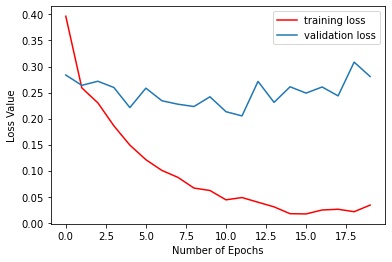

In [24]:
import matplotlib.pyplot as plt

#plotting training and validation loss
plt.plot(model.history['loss'], 'r', label = 'training loss')
plt.plot(model.history['val_loss'], label = 'validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

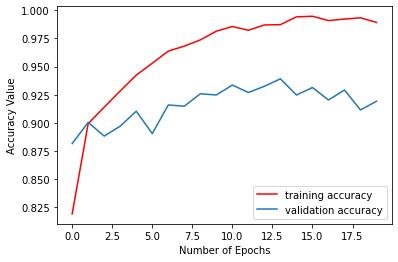

In [25]:
#plotting training and validation accuracy
plt.plot(model.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(model.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

### Predicting result on the test data

In [56]:
Y_pred = model.predict(X_test)
Y_pred

array([[7.3217474e-05, 9.9992681e-01],
       [9.6443841e-07, 9.9999905e-01],
       [9.9528533e-01, 4.7147255e-03],
       ...,
       [9.9999201e-01, 8.0087329e-06],
       [2.5086287e-01, 7.4913710e-01],
       [4.5693680e-03, 9.9543059e-01]], dtype=float32)

In [61]:
Y_pred_label = []
for i in Y_pred:
    y_pred_label = i[1] >0.5
    y_pred_label = int(y_pred_label)
    Y_pred_label.append(y_pred_label)

In [68]:
Y_pred_label

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [64]:
Y_test_label = []
for i in Y_test:
    y_test_label = i[1] >0.5
    y_test_label = int(y_test_label)
    Y_test_label.append(y_test_label)

In [84]:
Y_test_label

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [73]:
# making confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test_label, Y_pred_label))
print('accuracy :',accuracy_score(Y_test_label, Y_pred_label))

[[197   8]
 [  5 293]]
accuracy : 0.974155069582505


In [26]:
# saving the model
cnn.save('model2.h5')